# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
states = pd.read_csv("/Users/dianechiang/Desktop/MDST-Tutorial-Redesign-main/data/states_edu.csv")
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
states.rename(columns={"PRIMARY_KEY" : "YEAR_STATE"})
#states.dropna()

,YEAR_STATE,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [4]:
print(states["YEAR"].unique())
print(states["YEAR"].nunique())

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 1990 1991 2017 2019]
33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [5]:
michigan = states[states["STATE"] == "MICHIGAN"]
ohio = states[states["STATE"] == "OHIO"]
print(michigan["AVG_MATH_4_SCORE"].dropna())
print(ohio["AVG_MATH_4_SCORE"].dropna())

22      220.0
430     229.0
583     236.0
685     238.0
787     238.0
889     236.0
991     236.0
1093    237.0
1195    236.0
1435    236.0
1685    236.0
Name: AVG_MATH_4_SCORE, dtype: float64
35      219.0
443     230.0
596     238.0
698     242.0
800     245.0
902     244.0
1004    244.0
1106    246.0
1208    244.0
1526    241.0
1699    241.0
Name: AVG_MATH_4_SCORE, dtype: float64


Find the average for your outcome score across all states in 2019

In [6]:
states_19 = states[states["YEAR"] == 2019]
states_19["AVG_MATH_4_SCORE"].mean()

239.9433962264151

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [7]:
states.groupby(["STATE"])["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
states["expenditure_per_student"] = states["TOTAL_EXPENDITURE"] / states["GRADES_ALL_G"]
states["revenue_per_student"] = states["TOTAL_REVENUE"] / states["GRADES_ALL_G"]
states.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,expenditure_per_student,revenue_per_student
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221,3.661510
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,7.939520,8.568999
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774,4.837699
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044,3.877685
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536,4.997299
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,5.329154,5.199137
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN,7.618262,7.849520
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN,6.123254,6.185073
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN,9.178657,8.765830
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN,5.705866,5.807136


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1: Revenue_per_student VS. expenditure_per_student**

<AxesSubplot:title={'center':'Expenditure vs. Revenue (per student)'}, xlabel='revenue_per_student', ylabel='expenditure_per_student'>

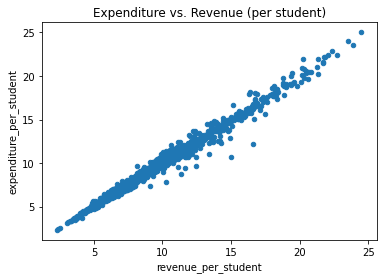

In [10]:
# expects higher revenue == higher expenditures 
states.plot.scatter(x = "revenue_per_student", y = "expenditure_per_student", title = "Expenditure vs. Revenue (per student)")

Expected that the richer the state (ie. higher renevue), the more money the state invest (ie. higher expenditure). To set common ground for comparison, expenditure_per_student and revenue_per_student are added. Based on the plot, there is a strong positive linear relationship between expenditure_per_student and revenue_per_student. In other words, the plot confirms the intial intuition that the higher the revenue, the higher the expenditure (per student). 

**Visualization 2**

<AxesSubplot:title={'center':'Expenditure per student VS. Avergage Eighth graders NAEP Math Exam Score'}, xlabel='expenditure_per_student', ylabel='AVG_MATH_8_SCORE'>

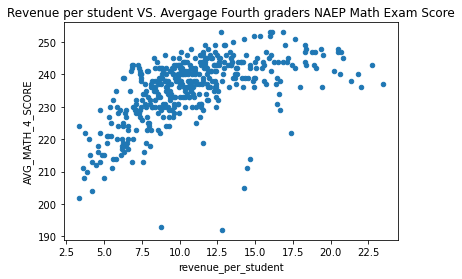

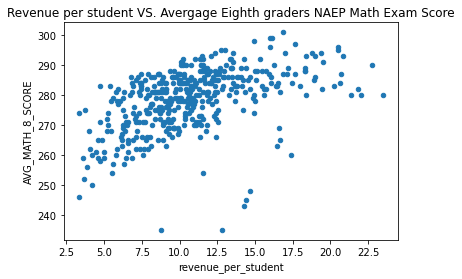

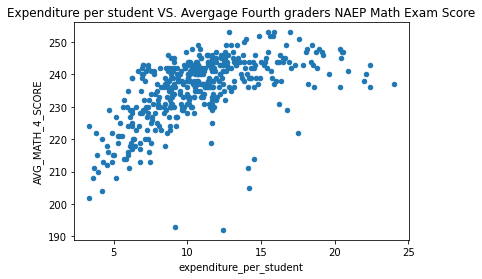

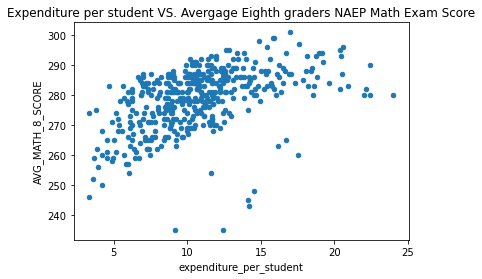

In [12]:
states.plot.scatter(x = "revenue_per_student", y = "AVG_MATH_4_SCORE", title = "Revenue per student VS. Avergage Fourth graders NAEP Math Exam Score")
states.plot.scatter(x = "revenue_per_student", y = "AVG_MATH_8_SCORE", title = "Revenue per student VS. Avergage Eighth graders NAEP Math Exam Score")
states.plot.scatter(x = "expenditure_per_student", y = "AVG_MATH_4_SCORE", title = "Expenditure per student VS. Avergage Fourth graders NAEP Math Exam Score")
states.plot.scatter(x = "expenditure_per_student", y = "AVG_MATH_8_SCORE", title = "Expenditure per student VS. Avergage Eighth graders NAEP Math Exam Score")

Expected higher revenue / higher expenditure (per student) for a state to have higher average math exam scores for both fourth graders and eighth graders. Based on the plots, there seems to be a possitive relationship but it is not as strong as the previous above. 

**Visualization 3**

<AxesSubplot:title={'center':'Expenditure per student VS. Avergage Eighth graders NAEP Reading Exam Score'}, xlabel='expenditure_per_student', ylabel='AVG_READING_8_SCORE'>

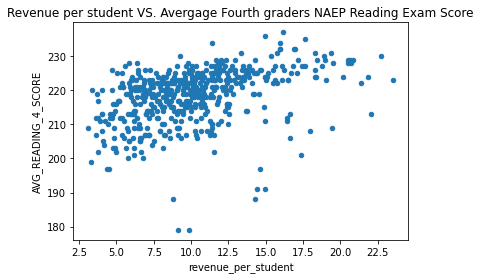

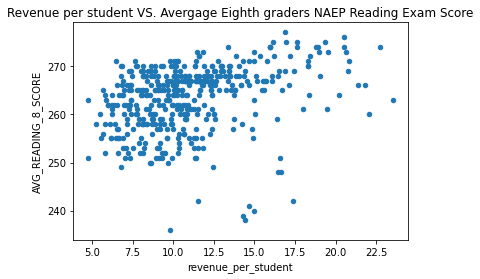

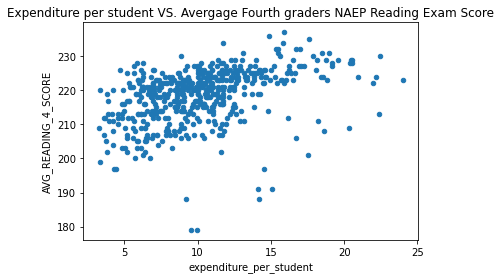

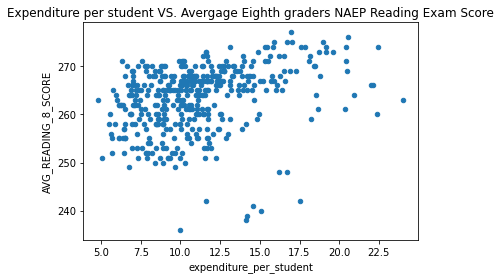

In [13]:
states.plot.scatter(x = "revenue_per_student", y = "AVG_READING_4_SCORE", title = "Revenue per student VS. Avergage Fourth graders NAEP Reading Exam Score")
states.plot.scatter(x = "revenue_per_student", y = "AVG_READING_8_SCORE", title = "Revenue per student VS. Avergage Eighth graders NAEP Reading Exam Score")
states.plot.scatter(x = "expenditure_per_student", y = "AVG_READING_4_SCORE", title = "Expenditure per student VS. Avergage Fourth graders NAEP Reading Exam Score")
states.plot.scatter(x = "expenditure_per_student", y = "AVG_READING_8_SCORE", title = "Expenditure per student VS. Avergage Eighth graders NAEP Reading Exam Score")

Expected higher revenue / higher expenditure (per student) for a state to have higher average reading exam scores for both fourth graders and eighth graders. Based on the plots, there seems to be a weak possitive relationship but this is the weakest amongst the three

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = states[["revenue_per_student"]].dropna()
y = states.loc[X.index]["expenditure_per_student"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [17]:
y_train

413      7.514331
778     11.076231
1107     8.501814
96       7.881397
309      5.607503
          ...    
1044     8.960336
1095     8.871649
1130    16.221856
860      7.749352
1126    11.486844
Name: expenditure_per_student, Length: 1020, dtype: float64

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [18]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [19]:
# create your model here
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [22]:
print(model.intercept_)
print(model.coef_)

0.2141973128333774
[0.98113693]


In [23]:
model.score(X_test, y_test)

0.987402220261171

In [24]:
np.mean(model.predict(X_test)-y_test)

-0.036019012418215264

In [25]:
np.mean(np.abs(model.predict(X_test)-y_test))

0.282513982415123

In [26]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

0.38917555391816466

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

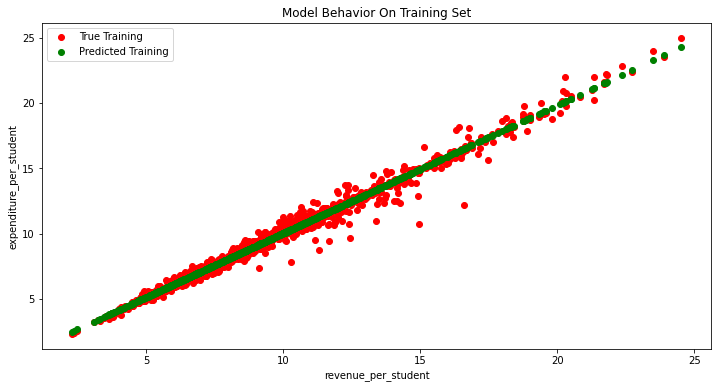

In [30]:
col_name = 'revenue_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('expenditure_per_student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

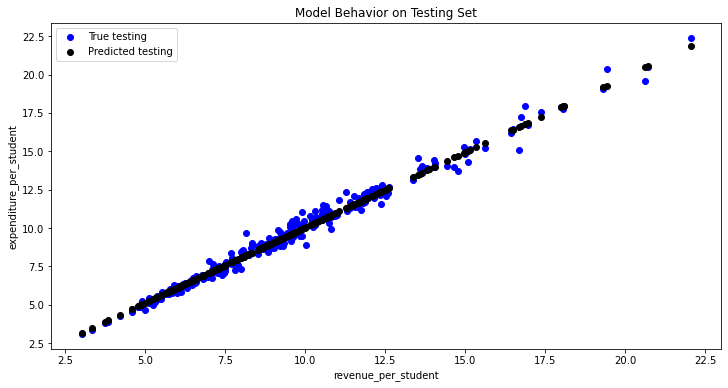

In [29]:
col_name = "revenue_per_student"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('expenditure_per_student')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

From the visualization, I found that there is a strong positive relationship between expenditure_per_student and revenue_per_student, so for the prediction section, I decided to predict expenditure_per_student based on revenue_per_student. The model turned out to be relatively accurate using the linear regression model, with the true testing and predicted testing overlapping for both training and testing sets.